## Is it a bird?

## Step 1: Download images of birds and non-birds

In [5]:
from fastbook import *
from fastai.vision.widgets import *

In [9]:
ims = search_images_ddg('bird')
len(ims)

200

In [11]:
dest = 'images/bird.jpg'
download_url(ims, dest)

Path('images/bird.jpg')

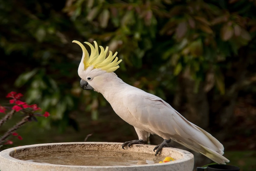

In [14]:
im = Image.open(dest)
im.to_thumb(256,256)

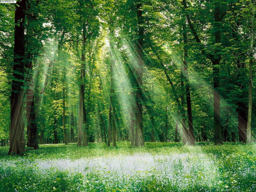

In [15]:
download_url(search_images_ddg('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [16]:
searches = 'forest','bird'
path = Path('bird_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images_ddg(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images_ddg(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images_ddg(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=256, dest=path/o)

## Step 2: Train our model

In [17]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

44

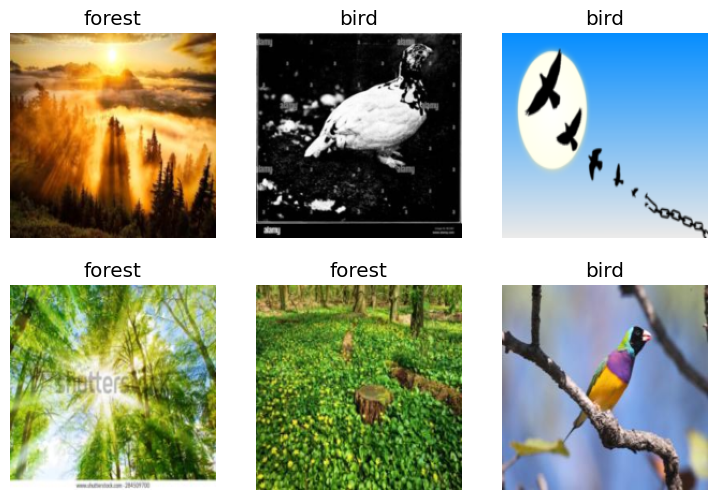

In [18]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [19]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.658842,0.103826,0.029126,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.120373,0.095465,0.024272,00:01
1,0.070281,0.117071,0.024272,00:01
2,0.047386,0.132205,0.024272,00:01


## Step 3: Use our model (and build your own!)

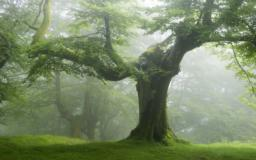

This is a: forest.
Probability it's a bird: 0.0001


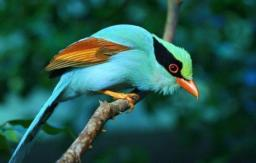

This is a: bird.
Probability it's a bird: 1.0000


In [34]:
forest_im_path = get_image_files(path/'forest')[0]
bird_im_path = get_image_files(path/'bird')[0]

is_bird,_,probs = learn.predict(PILImage.create(forest_im_path))
display(Image.open(forest_im_path).to_thumb(256,256))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

is_bird,_,probs = learn.predict(PILImage.create(bird_im_path))
display(Image.open(bird_im_path).to_thumb(256,256))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")